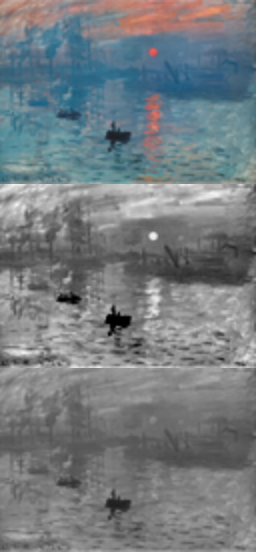

# ***vk.cc/c0li7U***


### Импортируйте cv2, math, numpy, функцию cv2_imshow. 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr
import math

### Скачайте через wget или загрузите в папку блокнота изображение по своему выбору.

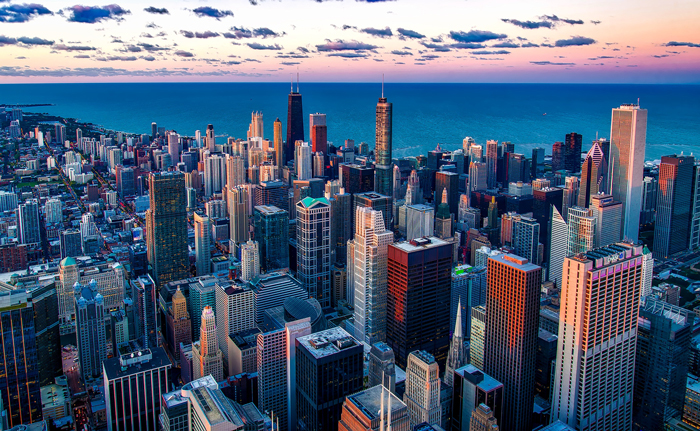

In [ ]:
img = cv2.imread("source.jpg")
cv2_imshow(img)

Можете использовать это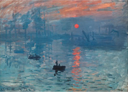

### Прочитайте изображение в переменную. Поскольку здесь алгоритм оптимизации работает без аппаратного ускорения на видеокарте, для приемлемой скорости работы уменьшите его до размера примерно 100х100 пикселей.


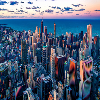

In [ ]:
img=cv2.resize(img,(100,100))
cv2_imshow(img)

### Далее перечислены функции с прошлого урока, подставьте ваши реализации

pixel_i и pixel_j - массивы из трех значений [L, a, b]

---



---



In [ ]:
lab = cv2.cvtColor(resized, cv2.COLOR_BGR2LAB)


dL возвращает Li - Lj

In [ ]:
def dL(pixel_i, pixel_j):
  diff = pixel_i[0]-pixel_j[0]
  return diff 

dC возвращает длину вектора цветности (корень из суммы квадратов)

In [ ]:
def dC(pixel_i, pixel_j):
  a=pixel_j[1]-pixel_i[1]
  b=pixel_j[2]-pixel_i[2]
  vector_length=math.sqrt(a**2+b**2)
  return vector_length

signdC возвращает знак скалярного произведения вектора цветности и вектора (cos(theta), sin(theta))

In [ ]:
def signdC(pixel_i, pixel_j, v):
  a = pixel_j[1]-pixel_i[1]
  b = pixel_j[2]-pixel_i[2]
  return a*math.cos(v[0])+b*math.sin(v[1])

alpha - произвольное число, x - произвольное число

crunch.png

In [ ]:
def crunch(alpha, x):
  crunch=alpha*math.tanh(x/alpha)
  return crunch

v - кортеж из двух чисел (cos(theta), sin(theta))

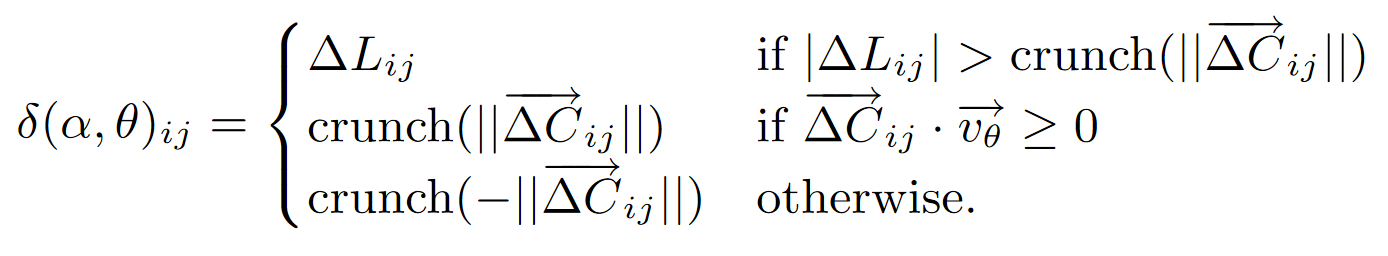

In [ ]:
def delta(alpha, v, pixel_i, pixel_j):
  L=dL(pixel_i, pixel_j)
  crunch_var=crunch(alpha,dC(pixel_i, pixel_j))
  C=signdC(pixel_i, pixel_j, v)
  if L>crunch_var:
    return L
  elif C*v[0]>=0:
    return C
  else:
    return C*-1

### Новая функция

L - канал L вашего изображения, data - одномерный массив с тем же количеством чисел. Преобразуйте L в одномерный массив с помощью функции ravel(). Посчитайте значение функции 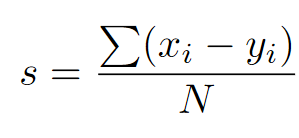 , где x - data, y - L, N - количество пикселей в изображении. Вычтите s из каждого элемента в data, верните полученный массив.

In [ ]:
def shift(data, L):
  sum=0
  x=data
  y=np.ravel(L)
  N=100*100
  for i in range(len(data)-1):
    sum=sum+x[i]-y[i]
  s=sum/N
  for i in range(len(data)-1):
     data[i]=data[i]-s
  return data 

### Функция оптимизации

In [ ]:
def solve_optimization_fast(r, alpha, theta, img):
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  L, _, _ = cv2.split(lab)
  lab = np.float64(lab.reshape(-1, lab.shape[-1])) - [0, 128, 128]
  data = np.float64(L.ravel())
  N = L.size
  d = np.zeros(N)
  w = img.shape[1]
  h = img.shape[0]
  v = (math.cos(theta), math.sin(theta))
  iters = 15
  print("Всего столбцов: ", w)
  for x in range(0, w):
    if (x % 25 == 0):
        print("Обработано столбцов: ", x)
    for y in range(0, h):
      i = x + y * w
      for xx in range(x - r, x + r + 1):
        if (xx < 0 or xx >= w):
          continue
        for yy in range(y - r, y + r + 1):
          if (yy >= h or yy < 0):
            continue
          j = xx + yy * w
          delta_ij = delta(alpha, v, lab[i], lab[j])
          d[i] += delta_ij
          d[j] -= delta_ij
  print("Всего итераций поиска оптимального распределения яркости: ", iters)
  for k in range(0, iters):
    print("Итерация: ", k)
    for x in range(0, w):
      for y in range(0, h):
        sum = 0
        count = 0
        for xx in range(x - r, x + r + 1):
          if (xx < 0 or xx >= w):
            continue
          for yy in range(y - r, y + r + 1):
            if (yy >= h or yy < 0):
              continue	
            sum += data[xx + yy * w]
            count += 1
          data[x + y * w] = (d[x + w * y] + sum) / count
  shift(data, L)
  data = data.reshape(L.shape)
  data = np.uint8(np.clip(np.around(data), 0, 255))
  return data

### Вызовите solve_optimization_fast от вашего изображения, поэкспериментируйте с параметрами

Всего столбцов:  100
Обработано столбцов:  0
Обработано столбцов:  25
Обработано столбцов:  50
Обработано столбцов:  75
Всего итераций поиска оптимального распределения яркости:  15
Итерация:  0
Итерация:  1
Итерация:  2
Итерация:  3
Итерация:  4
Итерация:  5
Итерация:  6
Итерация:  7
Итерация:  8
Итерация:  9
Итерация:  10
Итерация:  11
Итерация:  12
Итерация:  13
Итерация:  14


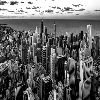

In [ ]:
cv2_imshow(solve_optimization_fast(5,1,4,img))